In [1]:
import numpy as np
import matplotlib.pylab as plt
import skimage
import random

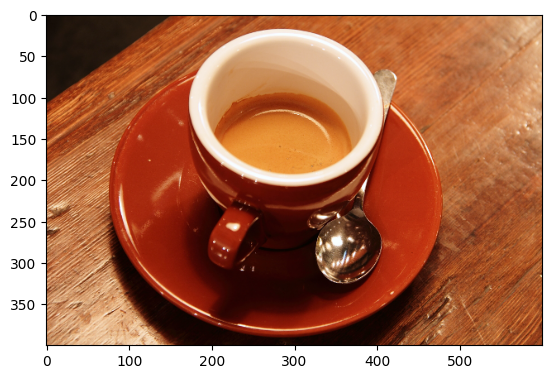

In [2]:
imagen=skimage.data.coffee()
plt.imshow(imagen)
cafe = skimage.data.coffee()

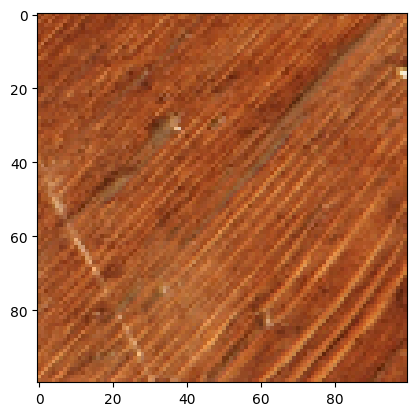

In [3]:
listaFilas=np.split(imagen,[100,200,300,400])
#plt.imshow(listaFilas[3])

lista=[np.split(listaFilas[i],[100,200,300,400,500,600],axis=1)for i in range(0,len(listaFilas))]

plt.imshow(lista[3][5])

Ejercicio: Tomando como referencia lo anterior, intenta desarrollar un paso del puzzle básico.
Como mínimo: partir la imagen en un número de zonas, poner el inferior izquierdo a negro, hacer algunos movimientos válidos desde la posición inicial.

Para optar a nota máxima: usando Programación Orientada a Objetos, hacer una clase Puzzle que permita varias imágenes, diferentes particiones, disponga de un método "movimiento" que permita realizar un movimiento básico, etc.

In [5]:
imagesplit = np.split(imagen,4)

In [6]:
imgs = [np.split(img, 4, axis = 1) for img in imagesplit]

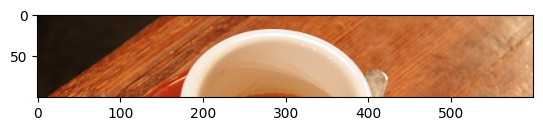

In [7]:
plt.imshow(np.hstack((imgs[0][0], imgs[0][1],imgs[0][2], imgs[0][3])))

In [10]:
imagesplit = np.split(imagen,4)
imgs = [np.split(img, 4, axis = 1) for img in imagesplit]
# images = [imagesplit[i][j] for i in range(4) for j in range(4)]

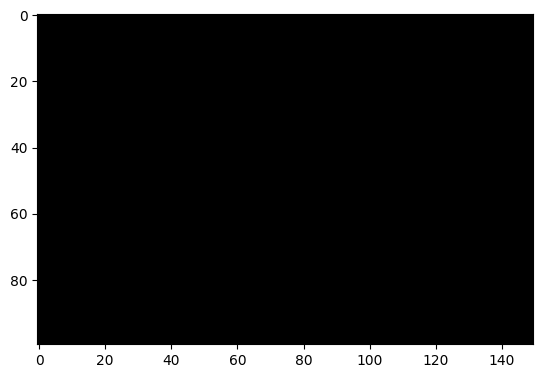

In [11]:
imagesplit = np.split(imagen,4)
imgs = [np.split(img, 4, axis = 1) for img in imagesplit]
blackshape = imgs[0][0].shape
imgs[3][0] = np.zeros(blackshape)
plt.imshow(imgs[3][0])

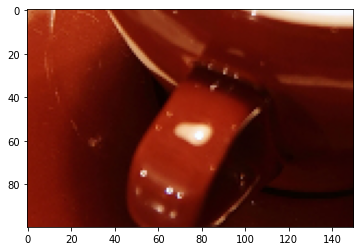

In [53]:
plt.imshow(imgs[2][1])
# imgs[3][3] = np.zeros(blackshape)
# imgs[3][3]

In [12]:
def join_image(imagesplit):
    """Toma los pedazos de imagen y la reconstruye. 

    Args:
        imagesplit (list): Lista de los trozos de la imagen.

    Returns:
        array: La imagen en su estado actual, uniendo los pedazos.
    """
    image = np.hstack((imagesplit[0][0], imagesplit[0][1],imagesplit[0][2], imagesplit[0][3]))
    for i in range(1,4):
        img = np.hstack((imagesplit[i][0], imagesplit[i][1],imagesplit[i][2], imagesplit[i][3]))
        image = np.vstack((image, img))
    plt.imshow((image).astype(np.uint8))


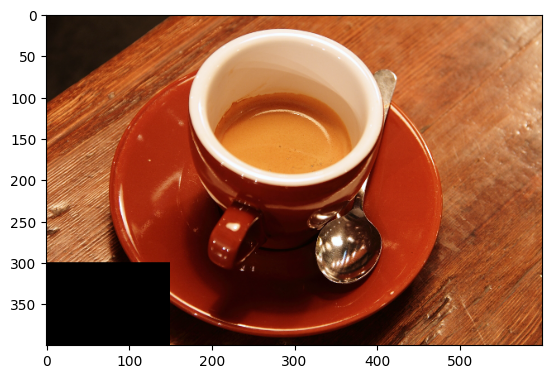

In [13]:
join_image(imgs)

In [14]:
class Puzzle:
    def __init__(self, image, n=4, m=4):
        """Docstring"""
        self.image = image
        self.n = 4
        self.m = 4
        self.imagesplit = np.array_split(self.image, 4)
        self.imgs = [np.array_split(img, 4, axis=1) for img in self.imagesplit]
        self.blackshape = self.imgs[0][0].shape
        self.imgs[3][3] = np.zeros(self.blackshape)
        self.i = 3
        self.j = 3

    def __str__(self):
        """lo devuelto por print() y str()"""
        return (f'({self.image})')
        
    def move_black(self, direction):
        if direction == 'up':
            if self.i > 0:
                self.imgs[self.i][self.j], self.imgs[self.i-1][self.j] = self.imgs[self.i-1][self.j], self.imgs[self.i][self.j]
                self.i -= 1
                join_image(self.imgs)
        elif direction == 'down':
            if self.i < 3:
                self.imgs[self.i][self.j], self.imgs[self.i+1][self.j] = self.imgs[self.i+1][self.j], self.imgs[self.i][self.j]
                self.i += 1
                join_image(self.imgs)
        elif direction == 'left':
            if self.j > 0:
                self.imgs[self.i][self.j], self.imgs[self.i][self.j-1] = self.imgs[self.i][self.j-1], self.imgs[self.i][self.j]
                self.j -= 1
                join_image(self.imgs)
        elif direction == 'right':
            if self.j < 3:
                self.imgs[self.i][self.j], self.imgs[self.i][self.j+1] = self.imgs[self.i][self.j+1], self.imgs[self.i][self.j]
                self.j += 1
                join_image(self.imgs)
        else:
            raise ValueError(f"Invalid direction: {direction}")
            




In [15]:
image_ = cafe.copy()
puzzle = Puzzle(image_)

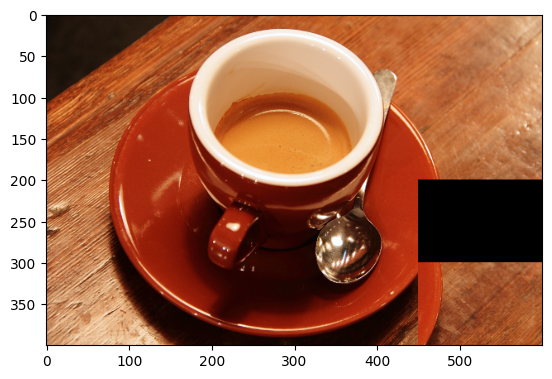

In [16]:
puzzle.move_black('up')

In [17]:
def new_game(image):
    plt.imshow(image)
    imag = Puzzle(image)
    # join_image(imag)
    while True:
        # join_image(imag)
        letter = input("""Tus movimientos son: 
        Derecha, teclea 'd' o 'D'.
        Izquierda, teclea 'a' o 'A'.
        Arriba, teclea 'w' o 'W'.
        Abajoa, teclea 's' o 'S'. 
        Salir, 'q', 'Q'.""")
        

        if ((letter == 'q') or (letter == 'Q')):
            break
        
        try:
            if (letter == 'd') or (letter == 'D'):
                imag.move_black('right')
                # imgs[i][j] , imgs[i][j+1] = imgs[i][j+1], imgs[i][j]
                # j = j + 1
        
            if (letter == 'a') or (letter == 'A'):
                imag.move_black('left')
                print('Hola')
                # imgs[i][j] , imgs[i][j-1] = imgs[i][j-1], imgs[i][j]
                # j = j - 1

            elif (letter == 'w') or (letter == 'W'):
                imag.move_black('up')
                # imgs[i][j] , imgs[i][j] = imgs[i+1][j], imgs[i-1][j]
                # i = i + 1

            elif (letter == 's') or (letter == 'S'):
                imag.move_black('down')
                # imgs[i][j] , imgs[i-1][j] = imgs[i-1][j], imgs[i][j]
                # i = i - 1
        except:
            print('Movimiento invalido')
    return None 

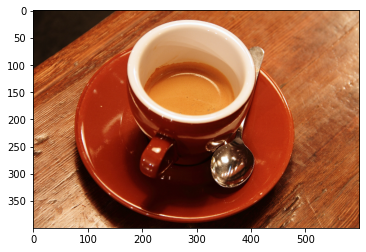

In [ ]:
im=skimage.data.coffee()
# plt.imshow(im)
ca = skimage.data.coffee()
new_game(ca)